In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [7]:
# Inspect the session engine
inspector = inspect(engine)

In [8]:
# Pull the names of each table
inspector.get_table_names()

['measurement', 'station']

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Exploratory Climate Analysis

PRECIPITATION ANALYSIS:

1. Design a query to retrieve the last 12 months of precipitation data
   a) Fetch the data in the measurement table
   b) Determine the column names for the query
   c) Perform a query to retrieve the data and precipitation scores for the last 12 months.
2. Calculate the date 1 year ago from the last data point in the database
3. Updated Query and DataFrame
   a) Perform a query to retrieve the data and precipitation scores for a year from the last data point
   b) Save the query results as a Pandas DataFrame and set the index to the date column
   c) Sort the DataFrame by date
4. Use Pandas Plotting with Matplotlib to plot the data
5. Use Pandas to calculate the summary statistics for the precipitation data


1. Design a query to retrieve the last 12 months of precipitation data a) Fetch the data in the measurement table b) Determine the column names for the query c) Perform a query to retrieve the data and precipitation scores for the last 12 months.

In [12]:
# Data in Measurement Table
measurement_table = engine.execute("SELECT * FROM measurement LIMIT 5").fetchall()
measurement_table

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
# Column name and type in the measurement_table
columns_measurement = inspector.get_columns("measurement")
for column in columns_measurement:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Design last 12 month query of precipitation
last_yr_prec = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2017-11-24").all()

# Set above query results to dataframe
last_yr_prec_df = pd.DataFrame(last_yr_prec)
last_yr_prec_df.head()

""


2. Calculate the date 1 year ago from the last data point in the database

In [15]:
# Determine the last day there was data recorded in this file since the last query had no records for the last year
last_date = session.query(func.max(Measurement.date)).scalar()
last_date

'2017-08-23'

3. Updated Query and DataFrame
   a) Perform a query to retrieve the data and precipitation scores for a year from the last data point
   b) Save the query results as a Pandas DataFrame and set the index to the date column
   c) Sort the DataFrame by date

In [16]:
# Design a 12 month query of precipitation (last date in file is 8/23/2017, so one year would be 8/23/2016-8/23/2017)
yr_prec = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").all()

# Create DataFrame with query results
yr_prec_df = pd.DataFrame(yr_prec,columns=["Date", "Precipitation"]).set_index("Date").sort_index()

yr_prec_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


4. Use Pandas Plotting with Matplotlib to plot the data

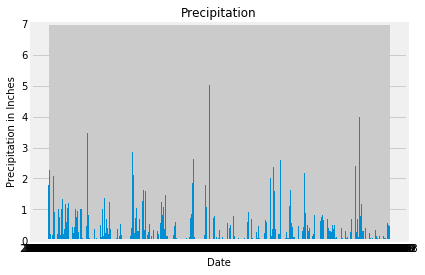

In [33]:
# Reset the Date index to chart
yr_prec_df = yr_prec_df.reset_index()

# Define labels
plt.title("Precipitation", fontsize=12)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Precipitation in Inches", fontsize=10)

# Define x,y
x_axis = yr_prec_df["Date"]
y_axis = yr_prec_df["Precipitation"]

# Define plot
plt.bar(x_axis, y_axis, alpha=1.0, align="center")
plt.grid(True)

# Save
plt.savefig("Charts/Precipitation.png")

# Display
plt.show()

5. Use Pandas to calculate the summary statistics for the precipitation data

In [18]:
# Precipitation Stats
yr_prec_df["Precipitation"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

STATION ANALYSIS:
    
1) Design a query to calculate the total number of stations.
    a) Station table.
    b) Determine column names.
    c) Query total number of stations.
2) Design a query to find the most active stations.
    a) List the stations and observation counts in descending order.
    b) Which station has the highest number of observations?
    c) Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.
3) Design a query to retrieve the last 12 months of temperature observation data (tobs).
    a) Filter by the station with the highest number of observations. 
    b) Plot the results as a histogram with bins=12.

1) Design a query to calculate the total number of stations.
   a) Station table.
   b) Determine column names.
   c) Query total number of stations.

In [19]:
# Data in the Station Table
station_table = engine.execute("SELECT * FROM station LIMIT 5").fetchall()
station_table

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [20]:
# Column name and type in the Station Table
columns_station = inspector.get_columns("station")
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [21]:
#Design a query to show how many stations are available in this dataset?
count_stations = session.query(func.count(Station.station)).first()
count_stations

print(f"There are {count_stations[0]} stations in the dataset.")

There are 9 stations in the dataset.


2) Design a query to find the most active stations. a) List the stations and observation counts in descending order. b) Which station has the highest number of observations? 

Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_groupby = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
stations_groupby

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Create DataFrame with query results
stations_groupby_df = pd.DataFrame(stations_groupby,columns=["Station", "Observations"])
stations_groupby_df.head()

,Station,Observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [24]:
# Station with the most observations
most_active_station = stations_groupby_df["Station"][0]
most_active_station

# Total Number of Observations for the Station with the most observations
total_observations = stations_groupby_df["Observations"].max()
total_observations

print(f"The most active station in this dataset is {most_active_station} with {total_observations} observations.")

The most active station in this dataset is USC00519281 with 2772 observations.


3) Design a query to retrieve the last 12 months of temperature observation data (tobs). a) Filter by the station with the highest number of observations. b) Plot the results as a histogram with bins=12.

In [25]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs) for the station with most observations
# (last date in file is 8/23/2017, so one year would be 8/23/2016-8/23/2017)
tobs_for_most_active_station = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-23").\
             filter(Measurement.station == most_active_station).all()
tobs_for_most_active_station

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [26]:
# Calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station
temp_min_max_avg_overall = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station).all()
temp_min_max_avg_overall

[(54.0, 85.0, 71.66378066378067)]

In [27]:
# Calculate the lowest temperature, highest temperature, and average temperature of the most active station for selected 12 months
# (last date in file is 8/23/2017, so one year would be 8/23/2016-8/23/2017)
temp_min_max_avg_yr = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station).filter(Measurement.date >= "2016-08-23").all()
temp_min_max_avg_yr

[(59.0, 83.0, 73.10795454545455)]

In [28]:
# Create DataFrame with the tobs results for the most active station so that we can create a chart.
tobs_for_most_active_station_df = pd.DataFrame(tobs_for_most_active_station,columns=["Date", "Tobs"])
tobs_for_most_active_station_df.head()

,Date,Tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


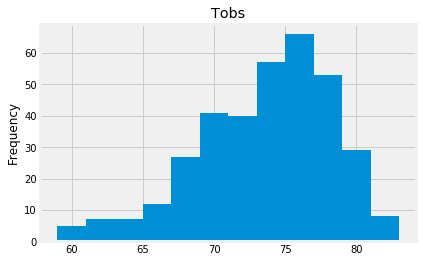

In [29]:
# Plot the results as a histogram
tobs_for_most_active_station_df.hist(bins = 12)
plt.ylabel('Frequency')

plt.savefig("Charts/Tobs_Hist.png")

TRIP ANALYSIS TABLE:

Calculate the rainfall per weather station for your trip dates (02/16/2019 - 2/24/2019) using the previous year's matching dates. Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation. (Hint: Merge DataFrames)

In [30]:
# Calculate the rainfall per weather station for your trip dates (02/16/2019 - 2/24/2019) using the previous year's matching dates.
historical_rainfall_for_trip = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
                               filter(Measurement.date >="2017-02-16").filter(Measurement.date <= "2017-02-24").all()
historical_rainfall_for_trip_df = pd.DataFrame(historical_rainfall_for_trip, columns = ["Station", "Date", "Precipitation*"]).\
                                  groupby("Station").sum().sort_values("Precipitation*", ascending=False)
historical_rainfall_for_trip_df

,Precipitation*
Station,
USC00519281,1.01
USC00519523,0.87
USC00513117,0.86
USC00514830,0.79
USC00516128,0.62
USC00519397,0.20
USC00517948,0.17


In [31]:
# Calculate ave_temp per weather station for your trip dates (02/16/2019 - 2/24/2019) using the previous year's matching dates.
historical_temp_for_trip = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
                               filter(Measurement.date >="2017-02-16").filter(Measurement.date <= "2017-02-24").all()
historical_temp_for_trip_df = pd.DataFrame(historical_temp_for_trip, columns = ["Station", "Date", "Temperature"]).\
                                  groupby("Station").mean().round(1).sort_values("Temperature", ascending=False)
historical_temp_for_trip_df

,Temperature
Station,
USC00514830,73.0
USC00519523,71.4
USC00519397,70.7
USC00513117,70.3
USC00517948,70.3
USC00519281,70.1
USC00516128,69.4


In [32]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation 
# (I added average temperature)
station_logistics = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
station_logistics_df = pd.DataFrame(station_logistics, columns = ["Station", "Name", "Latitude", "Longitude", "Elevation"])
station_logistics_df

rainfall_by_station_logistics_df = pd.merge(station_logistics_df,historical_rainfall_for_trip_df, on = "Station")
rainfall_by_station_logistics_df = rainfall_by_station_logistics_df.sort_values("Precipitation*", ascending=False)
rainfall_by_station_logistics_df

climate_by_station_logistics_df = pd.merge(rainfall_by_station_logistics_df,historical_temp_for_trip_df, on = "Station")
climate_by_station_logistics_df

,Station,Name,Latitude,Longitude,Elevation,Precipitation*,Temperature
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.01,70.1
1,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.87,71.4
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.86,70.3
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.79,73.0
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.62,69.4
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.20,70.7
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.17,70.3
